# Decision Tree prediction of Iris Dataset

In [1]:
#importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Reading the Iris dataset
df = pd.read_csv('F:/upworker/iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#drop the id column
df = df.drop(['Id'], axis =1)

In [4]:
#Description of the dataset

print("Statistical details of the dataset:")
print(df.describe())
print("______________________________________________________________________________________________________")

print("Summary of the dataframe:")
print(df.info())
print("______________________________________________________________________________________________________")

print("Shape of the dataset: ", df.shape)
print("______________________________________________________________________________________________________")

print("Column names in the dataset:")
print(df.columns)
print("______________________________________________________________________________________________________")

print("datatypes in the dateset: ")
print(df.dtypes)

Statistical details of the dataset:
       SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000
______________________________________________________________________________________________________
Summary of the dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150

In [5]:
#Check for null values
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
#lets group the data by Species column and have a look at various statistical attributes.
df.groupby('Species').describe()

SepalLengthCm                                              \
                        count   mean       std  min    25%  50%  75%  max   
Species                                                                     
Iris-setosa              50.0  5.006  0.352490  4.3  4.800  5.0  5.2  5.8   
Iris-versicolor          50.0  5.936  0.516171  4.9  5.600  5.9  6.3  7.0   
Iris-virginica           50.0  6.588  0.635880  4.9  6.225  6.5  6.9  7.9   

                SepalWidthCm         ... PetalLengthCm      PetalWidthCm  \
                       count   mean  ...           75%  max        count   
Species                              ...                                   
Iris-setosa             50.0  3.418  ...         1.575  1.9         50.0   
Iris-versicolor         50.0  2.770  ...         4.600  5.1         50.0   
Iris-virginica          50.0  2.974  ...         5.875  6.9         50.0   

                                                           
                  mean       std  min  25%  50%  75%  max  
Species                                                    
Iris-setosa      0.244  0.107210  0.1  0.2  0.2  0.3  0.6  
Iris-versicolor  1.326  0.197753  1.0  1.2  1.3  1.5  1.8  
Iris-virginica   2.026  0.274650  1.4  1.8  2.0  2.3  2.5  

[3 rows x 32 columns]

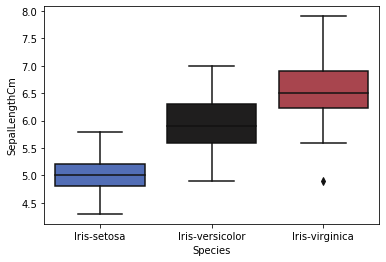

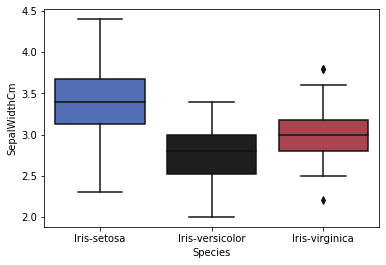

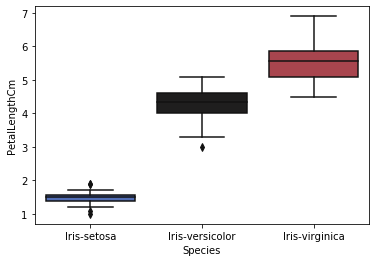

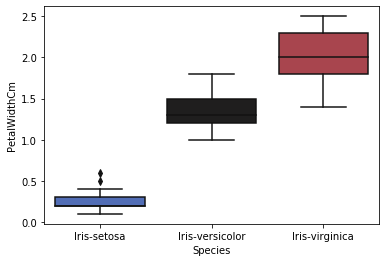

In [7]:
#lets have a better look with the help of boxplot

features = ['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']
for feature in features:
    sns.boxplot(x='Species',y=feature,data = df, palette='icefire')
    plt.show()

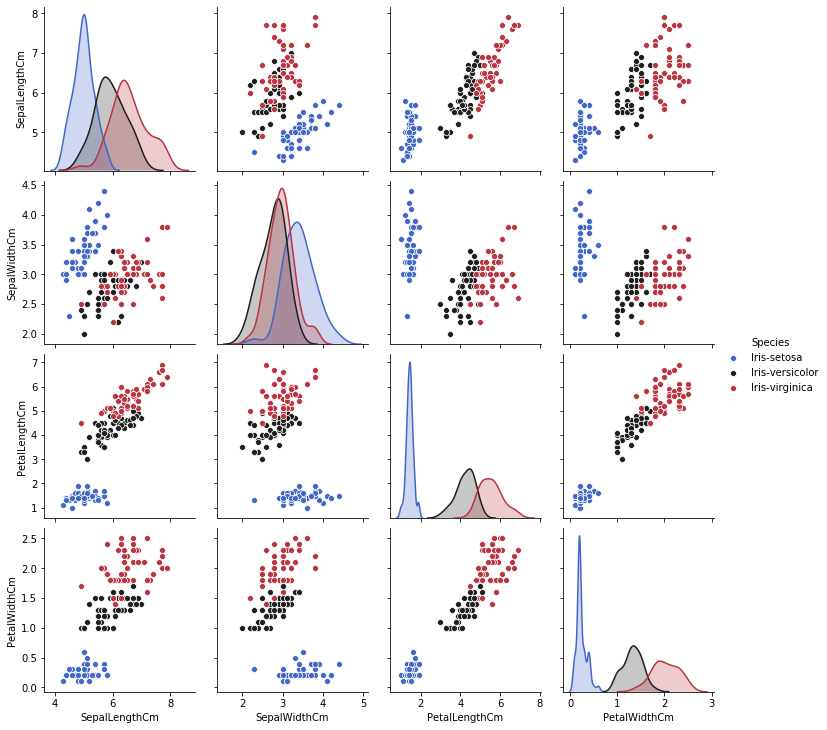

In [8]:
#pairplot
sns.pairplot(df, hue='Species', palette = 'icefire')

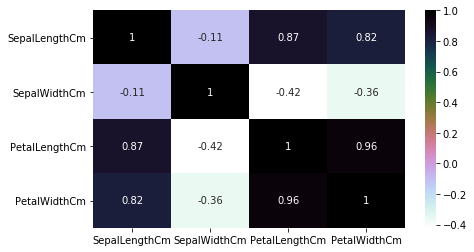

In [9]:
#lets have a look at the correlation matrix

plt.figure(figsize=(7,4))
sns.heatmap(df.corr(), annot=True, cmap='cubehelix_r')

In [10]:
# Splitting the dataset in input(x) and output(y) variables

x = df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']].values 
y = df['Species'].values

In [11]:
# label encoding y variable
lbEncoder = LabelEncoder()
y = lbEncoder.fit_transform(y)

In [12]:
# Splitting the data into training and testing datasets using scikit learn
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.3, random_state=0)

print("Training split input- ", x_train.shape)
print("Testing split input- ", x_test.shape)

Training split input-  (105, 4)
Testing split input-  (45, 4)


In [13]:
#Training the model using decision tree classifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [14]:
# Predicting the values of test data
y_pred = dec_tree.predict(x_test)
y_pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1, 0, 2, 1, 1, 2, 0, 2, 0,
       0])

In [15]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9777777777777777

In [16]:
#Classification report
print("Classification report - \n", classification_report(y_test,y_pred))

Classification report - 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Text(0.5, 1, 'Accuracy Score: 0.9777777777777777')

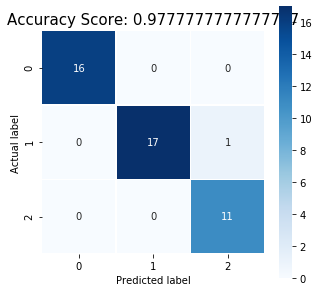

In [17]:
#lets plot the confusion matrix as follows:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(data=cm,linewidths=.5, annot=True,square = True,  cmap = 'Blues')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(dec_tree.score(x_test, y_test))
plt.title(all_sample_title, size = 15)

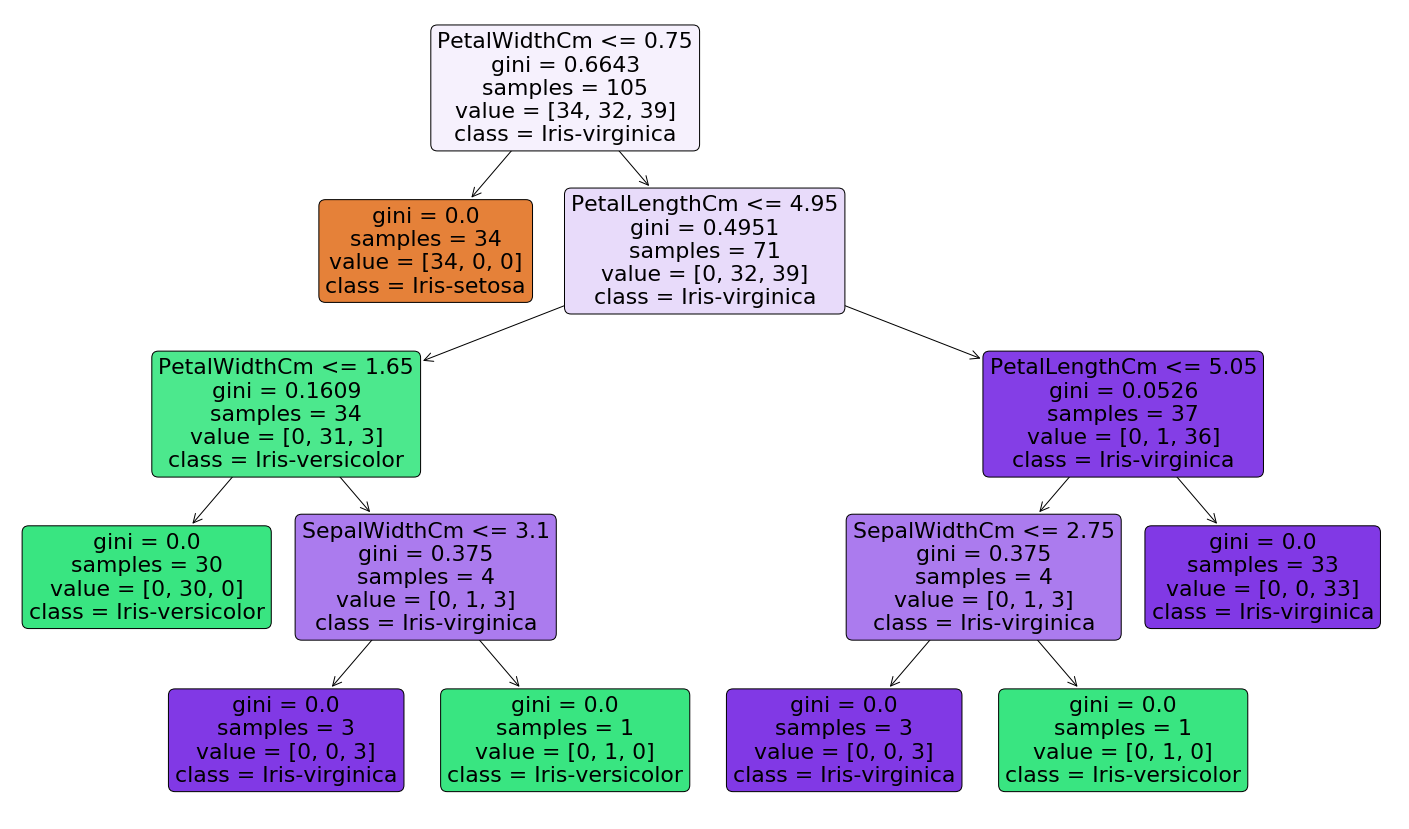

In [18]:
#Visualizing the decision tree
from sklearn.tree import plot_tree

plt.figure(figsize = (25,15))
tree_image = plot_tree(dec_tree,feature_names=df.columns,class_names=df['Species'].unique().tolist(),
                       precision=4,label='all',filled='True',rounded='True')

plt.show() 


thank you!